In [21]:
from pickle import load
from numpy import argmax

from keras.models import Model
from tensorflow.python.keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array
from keras_preprocessing.sequence import pad_sequences

from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import preprocess_input as preprocess_input_i
from keras.applications.vgg16 import preprocess_input as preprocess_input_v

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [22]:
def map_int_to_word(integer, tokenizer):
    for word, idx in tokenizer.word_index.items():
        if idx == integer:
            return word

    return None

def generate_caption(model, tokenizer, max_words, image):
    in_text = 'startseq'

    for i in range(max_words):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_words)

        y_hat = model.predict([image,seq], verbose=0)
        y_hat = argmax(y_hat)

        word = map_int_to_word(y_hat, tokenizer)
        if word is None:
            break

        in_text += ' ' + word

        if word == 'endseq':
            break

    return in_text

def print_image(path_image):
    image = mpimg.imread(path_image)
    plt.imshow(image)
    plt.show()

def extract_features(path_image, extractor, target_size, model_type):
    image = load_img(path_image, target_size=(target_size, target_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    if model_type == "vgg16":
        image = preprocess_input_v(image)
    elif model_type == "inception":
        image = preprocess_input_i(image)

    feature = extractor.predict(image, verbose=0)

    return feature

def generate_and_print_captions(path_image, extractor, target_size, models_paths, model_type):
    image_features = extract_features(path_image, extractor, target_size, model_type)

    for i, path in enumerate(models_paths):
        model = load_model(path)
        caption = generate_caption(model, tokenizer, max_words, image_features)
        print(str(i) + ' ' + caption)

In [23]:
curr_folder = "D:/YandexDisk/datasets/"
path_tokenizer = curr_folder + "ru-12k-tokenizer-train.pkl"
tokenizer = load(open(path_tokenizer, 'rb'))
max_words = 22

vgg16_extractor = VGG16()
vgg16_extractor = Model(inputs=vgg16_extractor.inputs, outputs=vgg16_extractor.layers[-2].output)
vgg16_target_size = 224

inception_extractor = InceptionV3(weights="imagenet")
inception_extractor = Model(inputs=inception_extractor.inputs, outputs=inception_extractor.layers[-2].output)
inception_target_size = 299

v0 = "D:/models/vgg16/model-0.h5"
v1 = "D:/models/vgg16/model-1.h5"
v2 = "D:/models/vgg16/model-2.h5"
v3 = "D:/models/vgg16/model-3.h5"
v4 = "D:/models/vgg16/model-4.h5"
v5 = "D:/models/vgg16/model-5.h5"
v6 = "D:/models/vgg16/model-6.h5"
v7 = "D:/models/vgg16/model-7.h5"
v8 = "D:/models/vgg16/model-8.h5"
v9 = "D:/models/vgg16/model-9.h5"
v10 = "D:/models/vgg16/model-10.h5"
v11 = "D:/models/vgg16/model-11.h5"
v12 = "D:/models/vgg16/model-12.h5"
v13 = "D:/models/vgg16//model-13.h5"
v14 = "D:/models/vgg16/model-14.h5"
v15 = "D:/models/vgg16/model-15.h5"
v16 = "D:/models/vgg16/model-16.h5"
v17 = "D:/models/vgg16/model-17.h5"
v18 = "D:/models/vgg16/model-18.h5"
v19 = "D:/models/vgg16/model-19.h5"

v0_2 = "D:/models/vgg16-2/model-0.h5"
v1_2 = "D:/models/vgg16-2/model-1.h5"
v2_2 = "D:/models/vgg16-2/model-2.h5"
v3_2 = "D:/models/vgg16-2/model-3.h5"
v4_2 = "D:/models/vgg16-2/model-4.h5"
v5_2 = "D:/models/vgg16-2/model-5.h5"
v6_2 = "D:/models/vgg16-2/model-6.h5"
v7_2 = "D:/models/vgg16-2/model-7.h5"
v8_2 = "D:/models/vgg16-2/model-8.h5"
v9_2 = "D:/models/vgg16-2/model-9.h5"
v10_2 = "D:/models/vgg16-2/model-10.h5"
v11_2 = "D:/models/vgg16-2/model-11.h5"
v12_2 = "D:/models/vgg16-2/model-12.h5"
v13_2 = "D:/models/vgg16-2//model-13.h5"
v14_2 = "D:/models/vgg16-2/model-14.h5"
v15_2 = "D:/models/vgg16-2/model-15.h5"
v16_2 = "D:/models/vgg16-2/model-16.h5"
v17_2 = "D:/models/vgg16-2/model-17.h5"
v18_2 = "D:/models/vgg16-2/model-18.h5"
v19_2 = "D:/models/vgg16-2/model-19.h5"

i0 = "D:/models/inception/model-0.h5"
i1 = "D:/models/inception/model-1.h5"
i2 = "D:/models/inception/model-2.h5"
i3 = "D:/models/inception/model-3.h5"
i4 = "D:/models/inception/model-4.h5"
i5 = "D:/models/inception/model-5.h5"
i6 = "D:/models/inception/model-6.h5"
i7 = "D:/models/inception/model-7.h5"
i8 = "D:/models/inception/model-8.h5"
i9 = "D:/models/inception/model-9.h5"
i10 = "D:/models/inception/model-10.h5"
i11 = "D:/models/inception/model-11.h5"
i12 = "D:/models/inception/model-12.h5"
i13 = "D:/models/inception/model-13.h5"
i14 = "D:/models/inception/model-14.h5"
i15 = "D:/models/inception/model-15.h5"
i16 = "D:/models/inception/model-16.h5"
i17 = "D:/models/inception/model-17.h5"
i18 = "D:/models/inception/model-18.h5"
i19 = "D:/models/inception/model-19.h5"

i0_2 = "D:/models/inception-2/model-0.h5"
i1_2 = "D:/models/inception-2/model-1.h5"
i2_2 = "D:/models/inception-2/model-2.h5"
i3_2 = "D:/models/inception-2/model-3.h5"
i4_2 = "D:/models/inception-2/model-4.h5"
i5_2 = "D:/models/inception-2/model-5.h5"
i6_2 = "D:/models/inception-2/model-6.h5"
i7_2 = "D:/models/inception-2/model-7.h5"
i8_2 = "D:/models/inception-2/model-8.h5"
i9_2 = "D:/models/inception-2/model-9.h5"
i10_2 = "D:/models/inception-2/model-10.h5"
i11_2 = "D:/models/inception-2/model-11.h5"
i12_2 = "D:/models/inception-2/model-12.h5"
i13_2 = "D:/models/inception-2/model-13.h5"
i14_2 = "D:/models/inception-2/model-14.h5"
i15_2 = "D:/models/inception-2/model-15.h5"
i16_2 = "D:/models/inception-2/model-16.h5"
i17_2 = "D:/models/inception-2/model-17.h5"
i18_2 = "D:/models/inception-2/model-18.h5"
i19_2 = "D:/models/inception-2/model-19.h5"

v_models = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9,
            v10, v11, v12, v13, v14, v15, v16, v17, v18, v19]

v_2_models = [v0_2, v1_2, v2_2, v3_2, v4_2, v5_2, v6_2, v7_2, v8_2, v9_2,
              v10_2, v11_2, v12_2, v13_2, v14_2, v15_2, v16_2, v17_2, v18_2, v19_2]

i_models = [i0, i1, i2, i3, i4, i5, i6, i7, i8, i9,
            i10, i11, i12, i13, i14, i15, i16, i17, i18, i19]

i_2_models = [i0_2, i1_2, i2_2, i3_2, i4_2, i5_2, i6_2, i7_2, i8_2, i9_2,
            i10_2, i11_2, i12_2, i13, i14, i15, i16, i17, i18, i19]

## Изображение 1

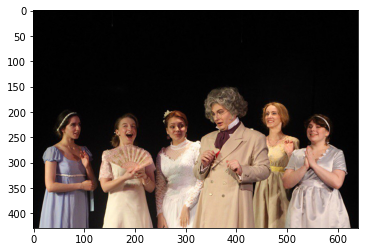

In [24]:
print_image('D:/downloads/00.jpg')

In [25]:
print("VGG16:")
generate_and_print_captions('D:/downloads/00.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq группа людей в черном и рубашке и женщина и женщина и женщина в черном и рубашке и женщина и женщина и женщина
1 startseq группа людей в ресторане endseq
2 startseq группа людей в ресторане endseq
3 startseq группа людей в черном платье и разговаривают endseq
4 startseq группа женщин стоит на пьедестале endseq
5 startseq две женщины стоят на полу и смеются endseq
6 startseq жених и невеста позируют для фотографии endseq
7 startseq жених и невеста стоят на полу endseq
8 startseq жених и невеста в красных рубашках поют в то время как мужчина держит в руках endseq
9 startseq жених и невеста в красных рубашках поют в то время как мужчина в смокинге и девочка в белом платье endseq
10 startseq жених и невеста уезжают по улице endseq
11 startseq жених и невеста позируют для фотографии endseq
12 startseq жених и невеста уезжают по тротуару endseq
13 startseq жених и невеста сидят на свадебном стуле endseq
14 startseq жених и невеста сидят на свадебном стуле endseq
15 startseq

In [6]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/00.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в в в в в в endseq
1 startseq группа людей в черной рубашке и очках и очках и очках и очках и очках и очках и очках и очках и
2 startseq группа людей в костюмах и в костюмах endseq
3 startseq группа людей и женщины в костюмах endseq
4 startseq группа молодых людей и женщины в костюмах и улыбаются endseq
5 startseq группа женщин и женщин в платьях стоят на улице endseq
6 startseq группа детей в платьях и женщина в черном платье и женщина в черном платье endseq
7 startseq группа детей и женщин позируют для фотографии endseq
8 startseq группа детей и женщин в черных рубашках endseq
9 startseq группа детей танцует на улице endseq
10 startseq группа женщин и женщин в черном платье endseq
11 startseq группа детей танцует в ладоши endseq
12 startseq группа детей танцует в ладоши endseq
13 startseq группа детей позирует для фотографии endseq
14 startseq группа мультикультурных мужчин в платках endseq
15 startseq группа мультикультурных женщин позирует дл

In [26]:
print("Inception:")
generate_and_print_captions('D:/downloads/00.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq группа людей в руках и женщина в руках endseq
1 startseq группа людей в ресторане endseq
2 startseq группа людей в ресторане endseq
3 startseq группа людей сидит на сцене и разговаривают endseq
4 startseq группа людей сидит на сцене и разговаривают endseq
5 startseq группа людей сидит на пьедестале обозначающем первое второе endseq
6 startseq группа людей сидит на скамейке и играет на гитаре endseq
7 startseq группа людей сидит на скамейке и хватается за руки endseq
8 startseq группа людей сидит на скамейке в комнате endseq
9 startseq группа людей сидит на скамейке в комнате endseq
10 startseq группа людей сидит на скамейке в комнате endseq
11 startseq группа людей сидит на скамейке в комнате endseq
12 startseq группа людей сидит на скамейке в комнате endseq
13 startseq группа людей сидит на скамейке в комнате с большими цветами endseq
14 startseq группа людей сидит на кухне с фейерверком endseq
15 startseq группа людей сидит на скамейке в комнате endseq
16 starts

In [4]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/00.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и
1 startseq группа людей в костюмах стоят на улице endseq
2 startseq группа людей в ресторане endseq
3 startseq группа людей в ресторане endseq
4 startseq группа людей в ладоши endseq
5 startseq группа людей в ладоши endseq
6 startseq группа людей в толпе людей endseq
7 startseq группа людей стоит в комнате endseq
8 startseq группа людей в вязаных костюмах и топах встают в толпе endseq
9 startseq группа людей позирует для фотографии endseq
10 startseq группа людей играет в видеоигры на ночам endseq
11 startseq группа людей позирует для фотографии endseq
12 startseq группа женщин и женщин в ладоши endseq
13 startseq группа людей сидит на скамейке в комнате с большими цветами endseq
14 startseq группа людей сидит на кухне с фейерверком endseq
15 startseq группа людей сидит на скамейке в комнате endseq
16 startseq группа людей танцует на улице endseq
17 startseq группа деву

## Изображение 2

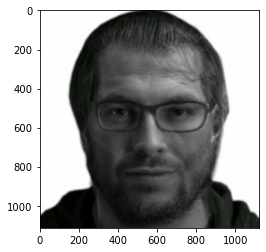

In [27]:
print_image('D:/downloads/01.jpg')

In [28]:
print("VGG16:")
generate_and_print_captions('D:/downloads/01.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq мужчина в очках и очках и очках и женщина в очках и очках и очках в руках endseq
1 startseq мужчина в очках и очках и очках в очках и очках в руках endseq
2 startseq мужчина в очках и очках и очках в очках endseq
3 startseq мужчина в очках и очках улыбается endseq
4 startseq мужчина в очках и очках улыбается endseq
5 startseq мужчина в очках и очках улыбается endseq
6 startseq мужчина в очках и очках улыбается endseq
7 startseq мужчина в очках и с усами в очках endseq
8 startseq мужчина в пальто и очках улыбается endseq
9 startseq мужчина в очках и с усами в руках улыбается endseq
10 startseq мужчина в очках и с усами в очках endseq
11 startseq мужчина в очках и с усами в очках endseq
12 startseq мужчина в очках и с усами в очках улыбается endseq
13 startseq мужчина в очках и с усами в очках улыбается endseq
14 startseq мужчина в очках и очках улыбается endseq
15 startseq мужчина в очках и очках улыбается endseq
16 startseq мужчина в очках и очках улыбается endseq
17 

In [7]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/01.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в endseq
1 startseq мужчина в черной рубашке и очках и очках и очках и очках и очках и очках держит на гитаре endseq
2 startseq мужчина в очках и очках и очках и очках и очках endseq
3 startseq мужчина в очках и очках и очках endseq
4 startseq мужчина в очках и очках держит на руках endseq
5 startseq мужчина в очках и очках держит на руках endseq
6 startseq мужчина в очках и очках держит на голове endseq
7 startseq мужчина в очках и очках держит в руках чашку endseq
8 startseq мужчина в очках и очках держит в руках очки endseq
9 startseq мужчина в очках и очках улыбается endseq
10 startseq мужчина в очках и очках улыбается endseq
11 startseq мужчина в очках и с короткими волосами улыбается endseq
12 startseq мужчина в очках и очках улыбается endseq
13 startseq мужчина в очках и очках держит на голове endseq
14 startseq мужчина в очках и очках endseq
15 startseq мужчина в очках и с короткими рубашке и в очках держит в руках чашку endseq
16 startse

In [29]:
print("Inception:")
generate_and_print_captions('D:/downloads/01.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq мужчина в черной рубашке и очках и женщина и женщина и женщина и женщина в руках endseq
1 startseq мужчина в черной рубашке и очках и женщина в очках и очках и очках в очках endseq
2 startseq мужчина в черной рубашке и очках держит на руках endseq
3 startseq мужчина в черной рубашке и очках держит на руках endseq
4 startseq мужчина в черной рубашке и очках в очках endseq
5 startseq мужчина в очках и женщина в очках endseq
6 startseq мужчина в очках и женщина в очках endseq
7 startseq мужчина в очках и женщина в очках endseq
8 startseq мужчина в очках и женщина в черном пальто и очках в шляпе endseq
9 startseq мужчина в очках и женщина в черном позируют для снимка endseq
10 startseq мужчина в очках и женщина в очках endseq
11 startseq мужчина в очках и женщина в черном пальто и женщина в черном позируют для снимка endseq
12 startseq мужчина в очках и женщина в черном позируют для снимка endseq
13 startseq мужчина в очках и с сумкой в руках endseq
14 startseq мужчин

In [5]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/01.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и в рубашке и
1 startseq мужчина в черной рубашке и очках и очках в руках endseq
2 startseq мужчина в очках и очках в руках endseq
3 startseq мужчина в очках и очках сидит на скамейке endseq
4 startseq мужчина в очках и очках endseq
5 startseq мужчина в очках и очках с фальшивыми сигарами endseq
6 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
7 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
8 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
9 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
10 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
11 startseq мужчина в очках и с фальшивыми сигарами в руках endseq
12 startseq мужчина в очках и очках endseq
13 startseq мужчина в очках и с сумкой в руках endseq
14 startseq мужчина в очках и женщина в очках endseq
15 startseq мужчина в очках и женщина в черном пози

## Изображение 3

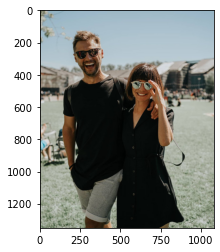

In [30]:
print_image('D:/downloads/02.jpg')

In [31]:
print("VGG16:")
generate_and_print_captions('D:/downloads/02.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq мужчина в черном рубашке и женщина и женщина и женщина и женщина и женщина и женщина и женщина и женщина и женщина
1 startseq мужчина в черном платье и женщина и женщина в черном платье и черных очках и женщина в черном платье endseq
2 startseq женщина в черном платье и черных очках и черных очках и черных очках endseq
3 startseq две женщины в платье стоят на улице endseq
4 startseq две женщины стоят на улице endseq
5 startseq две женщины стоят на улице endseq
6 startseq две женщины в платье стоят на улице endseq
7 startseq две девушки в платье стоят на улице endseq
8 startseq мужчина в черной рубашке и черных брюках идет по улице endseq
9 startseq мужчина в черном платье и черных туфлях идет по улице endseq
10 startseq мужчина в черном платье и черных брюках идет по улице endseq
11 startseq женщина в черном платье и солнцезащитных очках идет по улице endseq
12 startseq мужчина в черном платье и солнцезащитных очках улыбается endseq
13 startseq женщина в черном платье

In [8]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/02.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в в в в endseq
1 startseq мужчина в черном и очках и очках и очках и очках и очках и очках и очках и очках и очках и
2 startseq мужчина в черном платье и очках и очках и очках и очках и очках и очках и очках и очках и очках
3 startseq мужчина и женщина позируют на фотографии endseq
4 startseq мужчина и женщина позируют для фотографии endseq
5 startseq мужчина и женщина позируют для фотографии endseq
6 startseq мужчина и женщина позируют для фотографии endseq
7 startseq мужчина и женщина позируют для фотографии endseq
8 startseq мужчина и женщина позируют для фотографии endseq
9 startseq мужчина и женщина позируют для фотографии endseq
10 startseq мужчина и женщина позируют для фотографии endseq
11 startseq мужчина и женщина позируют для фотографии endseq
12 startseq мужчина и женщина позируют для фотографии endseq
13 startseq мужчина и женщина позируют для фотографии endseq
14 startseq мужчина и женщина позируют для фотографии endseq
15 startseq 

In [32]:
print("Inception:")
generate_and_print_captions('D:/downloads/02.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq мужчина в черной рубашке и очках и женщина и женщина и женщина в руках endseq
1 startseq мужчина в черном платье и очках держит на улице endseq
2 startseq мужчина в черной рубашке и очках держит на руках endseq
3 startseq мужчина в черном платье и очках идет по мобильному телефону endseq
4 startseq мужчина и женщина в зимних пальто позируют на улице endseq
5 startseq мужчина и женщина в зимних шапках позируют для фотографии endseq
6 startseq женщина в черном платье и женщина в очках endseq
7 startseq женщина в черном платье и женщина в черном платье endseq
8 startseq женщина в черном платье и женщина в черном платье endseq
9 startseq мужчина и женщина в черном позируют для фото endseq
10 startseq женщина в богемной шляпе и шарфе держит в руках собачий поводок endseq
11 startseq женщина в богемной шляпе и шарфе держит в руках собачий предмет endseq
12 startseq женщина в богемной майке и женщина в черной рубашке с прикрепленными носом в руках прижимающая к камере en

In [6]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/02.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке в рубашке и в рубашке в рубашке и очках в рубашке и очках и в рубашке
1 startseq мужчина в черном платье и очках и очках в руках endseq
2 startseq мужчина в очках и очках в руках endseq
3 startseq мужчина в очках и очках и очках endseq
4 startseq мужчина и женщина в черном пальто и черных рубашках endseq
5 startseq мужчина и женщина стоят на диване endseq
6 startseq мужчина и женщина стоят на улице endseq
7 startseq мужчина и женщина стоят на диване endseq
8 startseq мужчина и женщина стоят на диване endseq
9 startseq мужчина в черном пальто и солнцезащитных очках стоит на коленях endseq
10 startseq мужчина и женщина стоят на диване endseq
11 startseq мужчина и женщина в черных рубашках и с фальшивыми сигарами endseq
12 startseq мужчина в очках и солнцезащитных очках endseq
13 startseq мужчина и женщина одеваются endseq
14 startseq женщина в богемной свитере и с фонарем на голове endseq
15 startseq женщина в богемной свитере и сол

## Изображение 4

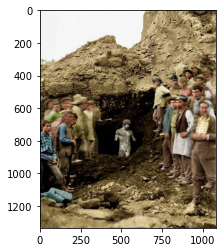

In [33]:
print_image('D:/downloads/03.jpg')

In [34]:
print("VGG16:")
generate_and_print_captions('D:/downloads/03.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq группа людей в костюмах и женщина на улице endseq
1 startseq группа людей в костюмах и оранжевых костюмах стоят на улице endseq
2 startseq группа людей в красных костюмах и белых рубашках стоят на пляже endseq
3 startseq группа людей в красных рубашках и красных рубашках стоят на пляже endseq
4 startseq группа людей стоит на пляже и смотрят на чтото endseq
5 startseq группа детей стоит на пляже endseq
6 startseq группа людей стоит на пляже endseq
7 startseq группа людей сидит на пляже и смотрит на чтото endseq
8 startseq группа людей сидит на шезлонгах и смотрит на чтото endseq
9 startseq группа девушекаборигенов в праздничных костюмах endseq
10 startseq группа людей стоит на пляже endseq
11 startseq группа людей собирается на открытом воздухе endseq
12 startseq группа людей стоит на пляже endseq
13 startseq группа людей стоит на улице и смотрит на чтото endseq
14 startseq группа детей позирует для фотографий на открытом воздухе endseq
15 startseq группа детей стоит н

In [9]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/03.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в в в в в в в в в в в в в в в в
1 startseq группа людей в черном и людей в рубашке и в в рубашке в и людей в рубашке и людей в воздухе endseq
2 startseq группа людей в белых рубашках и белых шортах и синих синих шортах endseq
3 startseq группа людей в белых рубашках и белых рубашки и белых рубашки и белых рубашки и белых рубашки и белых рубашки и белых
4 startseq группа людей и детей сидят на пляже endseq
5 startseq группа людей в оранжевых жилетах стоят на улице endseq
6 startseq группа людей в оранжевых жилетах и зеленых шортах и зеленых брюках стоят на пляже endseq
7 startseq группа людей в костюмах и женщина в белой одежде стоят на улице endseq
8 startseq группа людей в тюрбанах и красных шортах стоят на земле endseq
9 startseq группа людей в тюрбанах и коричневых шортах стоят на улице endseq
10 startseq группа детей сидит на слонах и третье животные endseq
11 startseq группа детей сидит на пьедестале endseq
12 startseq группа детей сидящих н

In [35]:
print("Inception:")
generate_and_print_captions('D:/downloads/03.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq мужчина в черной рубашке и шляпе и шляпе и женщина в белом рубашке на улице endseq
1 startseq группа людей в белом и шляпе и рубашки в белом пальто и шляпе в воздухе endseq
2 startseq группа людей стоит на земле с видом на заднем плане endseq
3 startseq группа людей стоит на вершине большого здания endseq
4 startseq группа людей стоит на вершине холма с видом на заднем плане endseq
5 startseq группа людей стоит на вершине горы endseq
6 startseq группа людей сидит на каньоне endseq
7 startseq группа людей сидит на каньоне endseq
8 startseq группа людей идет по тропинке в пустыне endseq
9 startseq группа людей идет по тропинке в лесу endseq
10 startseq группа людей идет по тропинке в лесу endseq
11 startseq группа людей идет по полю с сетями в руках endseq
12 startseq группа людей идет по тропинке в лесу endseq
13 startseq группа людей идет по полю с сетями в руках endseq
14 startseq группа людей идет по полю endseq
15 startseq группа людей идет по травянистому полю

In [7]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/03.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке и черном рубашке и в рубашке и черном рубашке и в рубашке и черном рубашке и
1 startseq группа людей в белых рубашках и белых рубашках стоят на улице endseq
2 startseq группа людей в оранжевых жилетах endseq
3 startseq группа людей в оранжевых жилетах стоят на улице endseq
4 startseq группа людей идущих по улице endseq
5 startseq группа людей идущих по улице endseq
6 startseq группа людей идущих по тропинке endseq
7 startseq группа людей идущих по железнодорожному путям endseq
8 startseq группа людей осматривающихся в линию на каньоне endseq
9 startseq группа людей осматривающихся в линию к каньоне endseq
10 startseq группа людей сидит на склоне горы endseq
11 startseq группа людей осматривающихся в затененной затененной камнем области endseq
12 startseq группа людей идущих по железнодорожному пути endseq
13 startseq группа людей идет по полю с сетями в руках endseq
14 startseq группа людей идет по полю endseq
15 startseq группа л

## Изображение 5

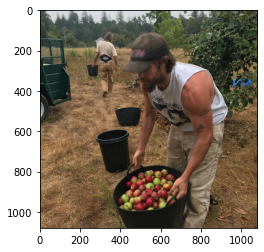

In [36]:
print_image('D:/downloads/04.jpg')

In [37]:
print("VGG16:")
generate_and_print_captions('D:/downloads/04.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq мужчина в красной рубашке и рубашке и рубашке и женщина и женщина и женщина и женщина в красной рубашке и рубашке и
1 startseq мужчина в синей рубашке и джинсах держит по улице endseq
2 startseq мужчина в синей рубашке и джинсах держит на руках endseq
3 startseq мужчина в красной рубашке и синих брюках держит на руках станке endseq
4 startseq мужчина в красной рубашке и синих брюках держит на руках ребенка endseq
5 startseq мужчина в красной рубашке и джинсах держит на руках дерево endseq
6 startseq мужчина в красной рубашке и джинсах держит на руках дерево endseq
7 startseq мужчина в красной рубашке и синих брюках держит в руках большую деревянную молоток endseq
8 startseq мужчина в красной рубашке и женщина в синей рубашке играют в недостроенном ванне endseq
9 startseq мужчина в красной рубашке и белых брюках играет в траве endseq
10 startseq мужчина в красной рубашке и джинсах играет в игру endseq
11 startseq мужчина в красной рубашке и джинсах держит молоток и смо

In [10]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/04.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в endseq
1 startseq мужчина в синей рубашке и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах
2 startseq мужчина в синей рубашке и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах и джинсах
3 startseq мужчина в красной рубашке и джинсах сидит на полу endseq
4 startseq маленький мальчик в синей рубашке и синих брюках сидит на полу endseq
5 startseq мужчина в красной рубашке с капюшоном с капюшоном с капюшоном с капюшоном с капюшоном с капюшоном с капюшоном с капюшоном с капюшоном
6 startseq маленький мальчик в синей рубашке и джинсах играет на кровать endseq
7 startseq маленький мальчик в желтой рубашке и шортах играет в камеру endseq
8 startseq маленький мальчик в синей рубашке играет с игрушкой в яме endseq
9 startseq мужчина в синей рубашке с капюшоном и джинсах играет на полу endseq
10 startseq мужчина в синей рубашке и джинсах играет на кухне endseq
11 startseq человек в бел

In [38]:
print("Inception:")
generate_and_print_captions('D:/downloads/04.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq мужчина в черной рубашке и очках и женщина и женщина и женщина в руках endseq
1 startseq мужчина в черной рубашке и очках держит еду endseq
2 startseq мужчина в белой рубашке и очках и очках держит на руках endseq
3 startseq мужчина в белой рубашке и джинсах держит на руках endseq
4 startseq мужчина в белой рубашке и очках держит на руках маленького бумаги endseq
5 startseq мужчина в синей рубашке и джинсах держит на руках маленького бумаги endseq
6 startseq мужчина в синей рубашке и джинсах держит на руках маленького бумаги endseq
7 startseq мужчина в синей рубашке и женщина в белой рубашке с длинными рукавами и очках в белой рубашке endseq
8 startseq мужчина в синей рубашке и женщина в зеленой рубашке лежат на полу endseq
9 startseq женщина в зеленой рубашке и синих джинсах занимается ремеслом endseq
10 startseq мужчина в синей рубашке и джинсах держит в руках журавляоригами endseq
11 startseq мужчина в зеленой рубашке и синих брюках играет в гольф endseq
12 sta

In [8]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/04.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке и в рубашке и в рубашке и очках в рубашке и очках в рубашке и в
1 startseq мужчина в черном платье и очках и очках в руках endseq
2 startseq мужчина в черном платье и очках в руках endseq
3 startseq мужчина в черной рубашке и джинсах сидит на кухне endseq
4 startseq мужчина в белой рубашке и джинсах сидит на коленях на коленях endseq
5 startseq мужчина в синей рубашке и джинсах стоит на коленях на коленях на земле endseq
6 startseq мужчина в синей рубашке и джинсах стоит на земле endseq
7 startseq мужчина в синей рубашке и синих джинсах стоит на коленях в то время как двое мужчин в синей рубашке и джинсах endseq
8 startseq мужчина в синей рубашке и синих джинсах стоит на крыше endseq
9 startseq мужчина в синей рубашке стоит в машине endseq
10 startseq мужчина в синей рубашке и синей рубашке держит на руках поднос с едой endseq
11 startseq мужчина в синей рубашке и синей рубашке держит на руках поднос с едой endseq
12 startseq мужч